
Task 1: Tagging a Person in Videos Taken in a Situation

In [ ]:

#pip install opencv-python

import cv2
import numpy as np

# Load the video file
video_path =r"C:\Users\Ganesh Reddy\Downloads\task1 sample video.mp4"
cap = cv2.VideoCapture(video_path)

# Initialize background subtractor
back_sub = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=True)

# Define parameters for tracking
person_id = None
person_color = (0, 255, 0)  # Bounding box color
font = cv2.FONT_HERSHEY_SIMPLEX

# Define a helper function for tracking by calculating centroids
def get_centroid(x, y, w, h):
    return (int(x + w / 2), int(y + h / 2))

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction to get moving areas
    fg_mask = back_sub.apply(frame)
    
    # Threshold the mask to binary
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        # Filter out small contours to ignore noise
        if cv2.contourArea(cnt) < 1000:
            continue

        # Get bounding box around the contour
        x, y, w, h = cv2.boundingRect(cnt)
        
        # Assume largest contour area belongs to person
        centroid = get_centroid(x, y, w, h)

        # Draw bounding box and label
        cv2.rectangle(frame, (x, y), (x + w, y + h), person_color, 2)
        cv2.putText(frame, "Person", (x, y - 10), font, 0.6, person_color, 2)

    # Display the frame with the bounding box
    cv2.imshow("Tracking", frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(200) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

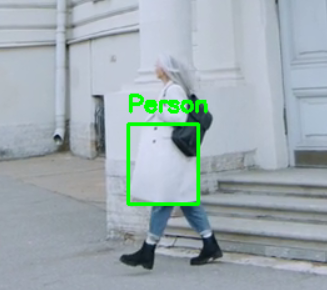


Task 2: Strategic Marketing – Peak Shopping Duration

Video duration: 10.87 seconds, FPS: 30.0, Total frames: 326
Interval 1: Average people count = 13.77
Interval 2: Average people count = 21.43
Interval 3: Average people count = 22.83
Interval 4: Average people count = 25.57
Interval 5: Average people count = 25.57
Interval 6: Average people count = 26.60
Interval 7: Average people count = 21.83
Interval 8: Average people count = 26.27
Interval 9: Average people count = 20.70
Interval 10: Average people count = 21.37


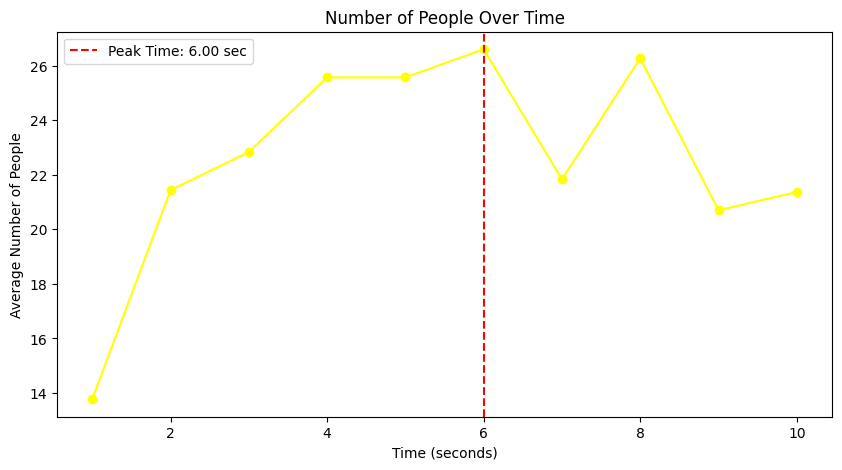

The peak shopping duration occurs at around 6.00 seconds with an average of 26.60 people.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load video
video_path = r"C:\Users\Ganesh Reddy\Downloads\task2 sample video.mp4"
cap = cv2.VideoCapture(video_path)

# Check if video is opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get the video's FPS and duration
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
video_duration = total_frames / fps
print(f"Video duration: {video_duration:.2f} seconds, FPS: {fps}, Total frames: {total_frames}")

# Background subtractor to detect people
back_sub = cv2.createBackgroundSubtractorMOG2()

# Variables to track people count over time
people_counts = []
frame_count = 0
time_interval = 1  # Analyze people count every 1 second
interval_people_count = 0
interval_frame_count = 0
time_intervals = []

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction to detect motion
    fg_mask = back_sub.apply(frame)
    
    # Morphological operations to remove noise
    kernel = np.ones((5, 5), np.uint8)
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
    
    # Find contours of detected moving objects
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    people_in_frame = 0
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter small objects by area (likely noise)
            # Get the bounding box coordinates for each detected person/object
            x, y, w, h = cv2.boundingRect(contour)
            
            # Draw a rectangle around the detected person/object
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            # Count the person
            people_in_frame += 1

    # Display the video with detection
    cv2.imshow('People Detection', frame)

    # Press 'q' to quit the video early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Count the number of people in the frame for the current interval
    interval_people_count += people_in_frame
    interval_frame_count += 1
    
    # If the time interval (1 second) has passed
    if frame_count % int(time_interval * fps) == 0 and frame_count > 0:
        # Average number of people during this time interval
        avg_people_count = interval_people_count / interval_frame_count
        people_counts.append(avg_people_count)
        time_intervals.append(frame_count / fps)  # Convert to seconds
        print(f"Interval {len(time_intervals)}: Average people count = {avg_people_count:.2f}")

        # Reset interval counters
        interval_people_count = 0
        interval_frame_count = 0
    
    frame_count += 1

# Release video capture and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

# Check if people_counts is not empty before proceeding
if people_counts:
    # Identify peak duration
    peak_time_index = np.argmax(people_counts)
    peak_time = time_intervals[peak_time_index]
    peak_people_count = people_counts[peak_time_index]

    # Plot the number of people over time intervals
    plt.figure(figsize=(10, 5))
    plt.plot(time_intervals, people_counts, marker='o', color='yellow')  # Change color to yellow
    plt.title('Number of People Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Average Number of People')
    plt.axvline(x=peak_time, color='r', linestyle='--', label=f'Peak Time: {peak_time:.2f} sec')
    plt.legend()
    plt.show()

    # Print the peak shopping duration result
    print(f"The peak shopping duration occurs at around {peak_time:.2f} seconds with an average of {peak_people_count:.2f} people.")
else:
    print("No intervals processed. Check if video contains relevant frames or if the detection logic needs adjustment.")


Task 3: Facial Recognition to Check Fraud Cases

In [ ]:
#task-3
import cv2
import numpy as np
import os


# Set paths for reference image and video
reference_image_path = r"C:\Users\Ganesh Reddy\Downloads\task3 reference image.png"
video_path = r"C:\Users\Ganesh Reddy\Downloads\task3 sample video.mp4"

# Specify output folder for matched frames
output_folder =r"C:\Users\Ganesh Reddy\Downloads\task3 output"
os.makedirs(output_folder, exist_ok=True)

# Load the reference image and convert it to grayscale
reference_image = cv2.imread(reference_image_path)
reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect face in the reference image
ref_faces = face_cascade.detectMultiScale(reference_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Ensure there's at least one face detected in the reference image
if len(ref_faces) == 0:
    print("No faces found in the reference image.")
    exit()
else:
    print(f"{len(ref_faces)} face(s) detected in the reference image.")

# Extract the detected face from the reference image (use the largest face)
x, y, w, h = max(ref_faces, key=lambda face: face[2] * face[3])
reference_face = reference_gray[y:y+h, x:x+w]

# Load the video
cap = cv2.VideoCapture(video_path)

# Initialize a frame counter
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the current frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    match_found = False  # Flag to check if any match is found in the current frame

    # Process each detected face in the frame
    for (fx, fy, fw, fh) in faces:
        # Extract the face from the frame
        face_in_frame = gray_frame[fy:fy+fh, fx:fx+fw]

        # Resize the reference face and detected face to the same size for comparison
        resized_reference = cv2.resize(reference_face, (fw, fh))
        match_result = cv2.matchTemplate(face_in_frame, resized_reference, cv2.TM_CCOEFF_NORMED)
        _, match_val, _, _ = cv2.minMaxLoc(match_result)

        # Check if match value exceeds threshold (indicates a match)
        match_threshold = 0.7
        if match_val > match_threshold:
            # Draw a rectangle around the matching face in the frame
            cv2.rectangle(frame, (fx, fy), (fx + fw, fy + fh), (0, 255, 0), 2)
            cv2.putText(frame, f'Match: {match_val:.2f}', (fx, fy - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            print(f"Match found in frame {frame_count} with similarity score: {match_val:.2f}")

            # Save the frame with match to the output folder
            output_frame_path = os.path.join(output_folder, f'frame_{frame_count}.jpg')
            cv2.imwrite(output_frame_path, frame)
            match_found = True

    # Display only frames with a detected match
    if match_found:
        cv2.imshow('Matching Frame', frame)

    # Break on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()

1 face(s) detected in the reference image.
Match found in frame 72 with similarity score: 0.70
Match found in frame 73 with similarity score: 0.72
Match found in frame 74 with similarity score: 0.77
Match found in frame 75 with similarity score: 0.76
Match found in frame 76 with similarity score: 0.74
Match found in frame 77 with similarity score: 0.77
Match found in frame 78 with similarity score: 0.76
Match found in frame 79 with similarity score: 0.81
Match found in frame 80 with similarity score: 0.79
Match found in frame 81 with similarity score: 0.75
Match found in frame 82 with similarity score: 0.72
Match found in frame 85 with similarity score: 0.70
Match found in frame 86 with similarity score: 0.73
Match found in frame 87 with similarity score: 0.71
Match found in frame 89 with similarity score: 0.70
Match found in frame 114 with similarity score: 0.71
Match found in frame 115 with similarity score: 0.71


Task 4: Number of People Entering and Exiting the Shop

In [ ]:


import cv2
import numpy as np

# Load the video
video_path = r"C:\Users\Ganesh Reddy\Downloads\task4 sample video.mp4"
cap = cv2.VideoCapture(video_path)

# Define region of interest (ROI) near the entrance
roi_x, roi_y, roi_width, roi_height = 100, 200, 200, 150  # Adjust based on entrance position

# Background subtraction for motion detection
fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)

# Initialize counters for people entering and exiting
enter_count = 0
exit_count = 0

# Variables to hold movement direction
last_direction = None
direction_threshold = 30  # Minimum movement threshold for counting

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Define the ROI for detecting motion at the entrance
    roi = frame[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blurred_roi = cv2.GaussianBlur(gray_roi, (5, 5), 0)

    # Detect motion using background subtraction
    fg_mask = fgbg.apply(blurred_roi)
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

    # Find contours to identify moving objects
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Ignore small contours to avoid noise
        if cv2.contourArea(contour) < 500:
            continue

        # Draw bounding box around detected motion in the ROI
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(roi, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Calculate movement direction (up for entering, down for exiting)
        if last_direction is None:
            last_direction = y
        else:
            direction = y - last_direction
            if abs(direction) > direction_threshold:
                if direction < 0:
                    enter_count += 1
                    print(f"Person entered, Total Entered: {enter_count}")
                elif direction > 0:
                    exit_count += 1
                    print(f"Person exited, Total Exited: {exit_count}")
                last_direction = y

    # Display the frame with ROI and motion highlighted
    cv2.rectangle(frame, (roi_x, roi_y), (roi_x+roi_width, roi_y+roi_height), (255, 0, 0), 2)
    cv2.putText(frame, f"Entered: {enter_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(frame, f"Exited: {exit_count}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imshow("Shop Entrance", frame)

    # Press 'q' to exit
    if cv2.waitKey(300) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

print(f"Final count - Entered: {enter_count}, Exited: {exit_count}")

Person exited, Total Exited: 1
Person entered, Total Entered: 1
Person exited, Total Exited: 2
Person entered, Total Entered: 2
Person exited, Total Exited: 3
Person entered, Total Entered: 3
Person exited, Total Exited: 4
Person entered, Total Entered: 4
Person exited, Total Exited: 5
Person entered, Total Entered: 5
Person exited, Total Exited: 6
Person entered, Total Entered: 6
Final count - Entered: 6, Exited: 6


Task 5: Dwelling Time in a Shopping Mall

In [ ]:
import cv2
import time

# Load the video
video_path = r"C:\Users\Ganesh Reddy\Downloads\task5 sample video.mp4" 
cap = cv2.VideoCapture(video_path)

# Define the region of interest (ROI) in the video
roi_top_left = (200, 150)  # Top-left corner of the ROI
roi_bottom_right = (400, 350)  # Bottom-right corner of the ROI

# Initialize background subtractor for detecting moving objects
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50, detectShadows=True)

# Variables to track people and their dwelling times
dwelling_times = {}
person_id_counter = 0
min_distance = 50  # Minimum distance to consider two detections as the same person

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Define the ROI area
    roi_frame = frame[roi_top_left[1]:roi_bottom_right[1], roi_top_left[0]:roi_bottom_right[0]]
    cv2.rectangle(frame, roi_top_left, roi_bottom_right, (0, 255, 0), 2)

    # Apply background subtraction to the ROI
    fg_mask = bg_subtractor.apply(roi_frame)
    _, fg_mask = cv2.threshold(fg_mask, 244, 255, cv2.THRESH_BINARY)

    # Find contours in the foreground mask to detect people
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    current_frame_positions = []

    # Process each detected contour
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Filter out small detections
            (x, y, w, h) = cv2.boundingRect(contour)
            person_center = (roi_top_left[0] + x + w // 2, roi_top_left[1] + y + h // 2)
            current_frame_positions.append(person_center)

            # Check if this detected person is close to an already-tracked person
            person_id = None
            for pid, info in dwelling_times.items():
                # Calculate the distance between current detection and tracked person
                tracked_center = info['last_position']
                distance = ((person_center[0] - tracked_center[0]) ** 2 + (person_center[1] - tracked_center[1]) ** 2) ** 0.5

                if distance < min_distance:
                    person_id = pid
                    break

            # If no matching person is found, assign a new ID
            if person_id is None:
                person_id = person_id_counter
                dwelling_times[person_id] = {
                    "entry_time": time.time(),
                    "dwelling_time": 0,
                    "last_position": person_center
                }
                person_id_counter += 1

            # Update person's position and calculate dwelling time
            dwelling_times[person_id]["last_position"] = person_center
            dwelling_times[person_id]["dwelling_time"] = time.time() - dwelling_times[person_id]["entry_time"]

            # Draw bounding box and labels
            cv2.rectangle(frame, (roi_top_left[0] + x, roi_top_left[1] + y),
                          (roi_top_left[0] + x + w, roi_top_left[1] + y + h), (0, 0, 255), 2)
            cv2.putText(frame, f"Person {person_id}", (person_center[0], person_center[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            cv2.putText(frame, f"Time: {dwelling_times[person_id]['dwelling_time']:.1f} sec",
                        (person_center[0], person_center[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display the frame with annotations
    cv2.imshow("Dwelling Time Tracking", frame)

    # Break if 'q' is pressed
    if cv2.waitKey(200) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# Print total dwelling time for each person tracked
print("Dwelling Times:")
for pid, times in dwelling_times.items():
    print(f"Person {pid}: {times['dwelling_time']:.2f} seconds")


Dwelling Times:
Person 0: 15.60 seconds
Person 1: 36.62 seconds
Person 2: 33.34 seconds
Person 3: 25.72 seconds
Person 4: 12.52 seconds
Person 5: 8.57 seconds
Person 6: 0.22 seconds
Person 7: 0.44 seconds
Person 8: 5.66 seconds


Task 6: Spotting and Counting a Branded Car in a Video

In [ ]:
import cv2
import numpy as np
import os

# Load the video
video_path = r"C:\Users\Ganesh Reddy\Downloads\task6 sample video.mp4"
cap = cv2.VideoCapture(video_path)

# Define color ranges for different car colors in HSV
color_ranges = {
    "red": [(0, 50, 50), (10, 255, 255)],
    "white": [(0, 0, 200), (180, 20, 255)],
    "green": [(40, 50, 50), (80, 255, 255)],
    "blue": [(100, 50, 50), (140, 255, 255)]
}

# Initialize background subtractor for motion detection
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=50)

# Initialize counters for each color
car_counts = {color: 0 for color in color_ranges}

# Define a list to store frames with detected cars of each color
frames_with_cars = {color: [] for color in color_ranges}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction to detect moving objects (cars)
    fg_mask = bg_subtractor.apply(frame)
    _, fg_mask = cv2.threshold(fg_mask, 200, 255, cv2.THRESH_BINARY)

    # Find contours of moving objects
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process each detected car in the frame
    for contour in contours:
        # Filter out small contours to ignore noise
        if cv2.contourArea(contour) < 1000:
            continue

        # Get the bounding box of the detected car
        x, y, w, h = cv2.boundingRect(contour)
        car_roi = frame[y:y+h, x:x+w]

        # Convert ROI to HSV for color-based matching
        hsv_roi = cv2.cvtColor(car_roi, cv2.COLOR_BGR2HSV)

        # Detect each color in the car ROI
        for color, (lower, upper) in color_ranges.items():
            color_mask = cv2.inRange(hsv_roi, np.array(lower), np.array(upper))
            color_ratio = cv2.countNonZero(color_mask) / (w * h)

            # Set a threshold for color detection (adjust as needed)
            if color_ratio > 0.5:  # Adjust threshold as needed
                car_counts[color] += 1
                frames_with_cars[color].append(frame.copy())

                # Draw bounding box and label for detected car color
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, f'{color.capitalize()} Car Detected', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                break  # Stop once one color is detected per frame

    # Display the frame with detections
    cv2.imshow("Car Color Detection", frame)

    # Press 'q' to quit
    if cv2.waitKey(200) & 0xFF == ord('q'):
        break

# Release the video capture and close windows
cap.release()
cv2.destroyAllWindows()

# Output the results
for color, count in car_counts.items():
    print(f"Total {color} cars detected: {count}")
print("Frames with detected cars have been stored for further review.")

# Save frames with detected cars to an output folder (optional)
output_folder = 'car_color_frames'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for color, frames in frames_with_cars.items():
    color_folder = f"{output_folder}/{color}"
    if not os.path.exists(color_folder):
        os.makedirs(color_folder)
    for i, detected_frame in enumerate(frames):
        cv2.imwrite(f"{color_folder}/frame_{i+1}.jpg", detected_frame)


Total red cars detected: 0
Total white cars detected: 16
Total green cars detected: 0
Total blue cars detected: 53
Frames with detected cars have been stored for further review.
